In [111]:
import tensorflow
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import os
from jupyterthemes import jtplot #for making plots appear with same theme
jtplot.style(theme='chesterish', context='notebook', ticks=True, grid=False)

In [17]:
data_dir = 'C:\\Users\\kevin\\Desktop'
os.listdir(data_dir)

['100x.tif',
 'AI',
 'cafe_1562096445.mpg',
 'CMS',
 'desktop.ini',
 'Kivy',
 'MacGyver2.exe',
 'OldVersions',
 'rebind.ahk',
 'Slack.lnk',
 'test',
 'test.py',
 'train',
 'untitled1.py']

In [18]:
from matplotlib.image import imread 
#allows to read in image files

In [19]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [20]:
os.listdir(test_path)

['greater than 0.5 dark', 'less than 0.5 dark']

In [21]:
os.listdir(train_path+'greater than 0.5 dark')[0]

'p1mask_10.png'

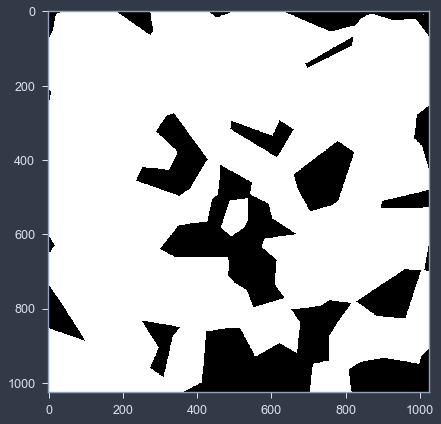

In [88]:
dark = train_path+ 'less than 0.5 dark\\'+ 'p2mask_19.png'
dark_img = plt.imshow(imread(dark), cmap ='gist_gray')

In [89]:
image_shape = (130,130,3)

In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range = 0.1,
                              zoom_range = 0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

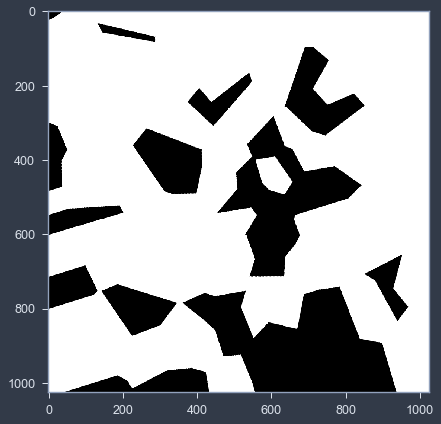

In [91]:
ImageDataGenerator
dark_cell = imread(dark)
plt.imshow(dark_cell)
plt.imshow(image_gen.random_transform(dark_cell))

In [92]:
image_gen.flow_from_directory(train_path)


Found 16 images belonging to 2 classes.


In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout 

In [94]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)            

In [96]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [97]:
train_image_gen = image_gen.flow_from_directory(train_path, 
                                               target_size=(130,130),
                                               color_mode = 'rgb',
                                               class_mode='binary',
                                               shuffle='True')

Found 16 images belonging to 2 classes.


In [98]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                                               target_size=(130,130),
                                               color_mode = 'rgb',
                                               class_mode='binary',
                                               shuffle=False)

Found 18 images belonging to 2 classes.


In [99]:
train_image_gen.class_indices

{'greater than 0.5 dark': 0, 'less than 0.5 dark': 1}

In [100]:
results= model.fit_generator(train_image_gen, 
                             epochs = 20,
                             validation_data=test_image_gen)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 4.8005 - accuracy: 0.6875 - val_loss: 9.3703 - val_accuracy: 0.3889
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 8.6421 - accuracy: 0.4375 - val_loss: 9.3703 - val_accuracy: 0.3889
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 7.1733 - accuracy: 0.5000 - val_loss: 5.9986 - val_accuracy: 0.6111
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 5.7786 - accuracy: 0.6250 - val_loss: 5.9986 - val_accuracy: 0.6111
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 5.7844 - accuracy: 0.6250 - val_loss: 5.9986 - val_accuracy: 0.6111
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 5.7844 - accuracy: 0.6250 - val_loss: 5.9986 - val_accuracy: 0.6111
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 5.7844 - accuracy: 0.6250 - val_loss: 5.9986 - val_accuracy: 0.6111
Epoch 8/20
1/1 [=========================

In [101]:
model.evaluate_generator(test_image_gen)

[5.99859094619751, 0.6111111]

In [102]:
model.metrics_names

['loss', 'accuracy']

In [103]:
pred = model.predict_generator(test_image_gen)

In [113]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,4.800488,0.6875,9.370313,0.388889
1,8.642141,0.4375,9.370313,0.388889
2,7.173300,0.5000,5.998591,0.611111
3,5.778624,0.6250,5.998591,0.611111
4,5.784356,0.6250,5.998591,0.611111
5,5.784356,0.6250,5.998591,0.611111
6,5.784356,0.6250,5.998591,0.611111
7,5.784356,0.6250,5.998591,0.611111
8,5.784356,0.6250,5.998591,0.611111
9,5.784356,0.6250,5.998591,0.611111


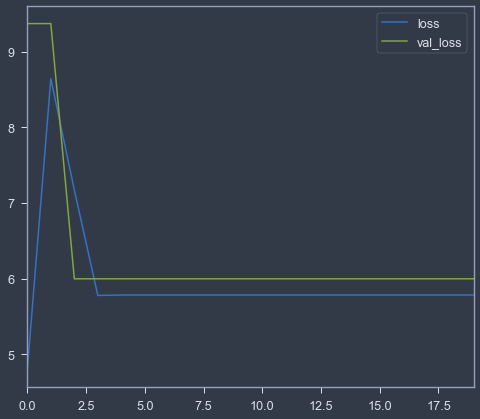

In [114]:
metrics[['loss','val_loss']].plot() 

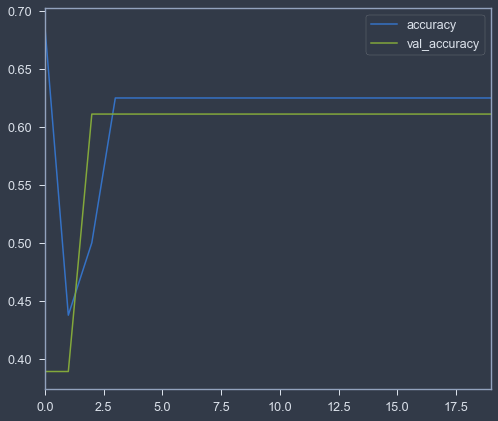

In [115]:
metrics[['accuracy','val_accuracy']].plot() 